# PREDICCION DE PRECIOS DE AGUACATE EN EEUU





# Enunciado del Problema

- Los datos representan ventas semanales desde 2015 a 2018 a nivel de todos los EEUU. 
- Los datos provienen directamente de las cajas registradoras basados en ventas de aguacate variedad Hass. 
- El precio promedio de los aguacates reflejan el costo por unidad, aún cuando estos se vendan por bolsas. 
- Los códigos (Product Lookup codes ó PLU) en la tabla son solo de aguacates Hass.  No se incluyen otras variedades.

Columnas relevantes en el conjunto de datos:

- Date - la fecha de la observación
- AveragePrice - el precio promedio de una unidad
- type - convencional u orgánico
- year - el año
- Region - la ciudad o región de la observación
- Total Volume - número total de aguacates vendidos
- 4046 - número total de aguacates con PLU 4046 vendidos
- 4225 - número total de aguacates con PLU 4225 vendidos
- 4770 - número total de aguacates con PLU 4770 vendidos



# Importar las librerías

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import prophet
import seaborn as sns

# Carga de datos

In [72]:
dataset = pd.read_csv("aguacates_EEUU.csv")

# Explorar el conjunto de datos  

In [73]:
dataset.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [75]:
dataset.shape

(18249, 14)

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [78]:
dataset.isnull().values.any()

False

# Asegurar que estén los datos en orden cronológico

In [79]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%Y-%m-%d')

In [80]:
dataset = dataset.sort_values(by='Date', ascending=True)
dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California



# Realizar una gráfica de precios promedio vrs fecha

¿Cuál es la tendencia a nivel nacional?

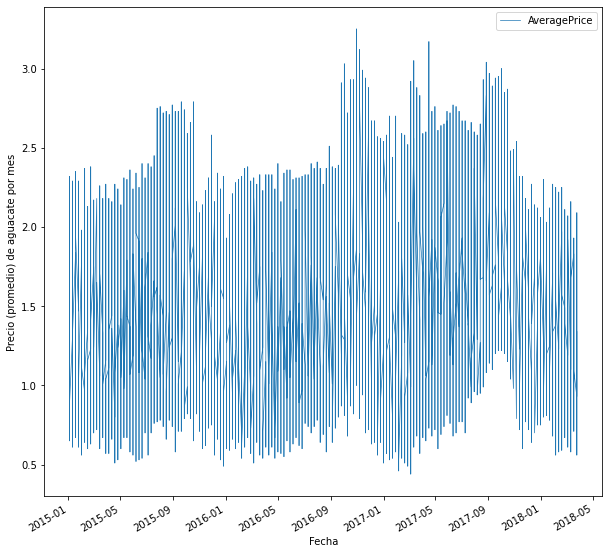

In [81]:
ax = dataset.plot(y='AveragePrice', x='Date', linewidth=0.7, figsize=(10,10))
ax.set_ylabel("Precio (promedio) de aguacate por mes")
ax.set_xlabel("Fecha")
plt.show()

# Realizar una gráfica de barras para ver el número de regiones

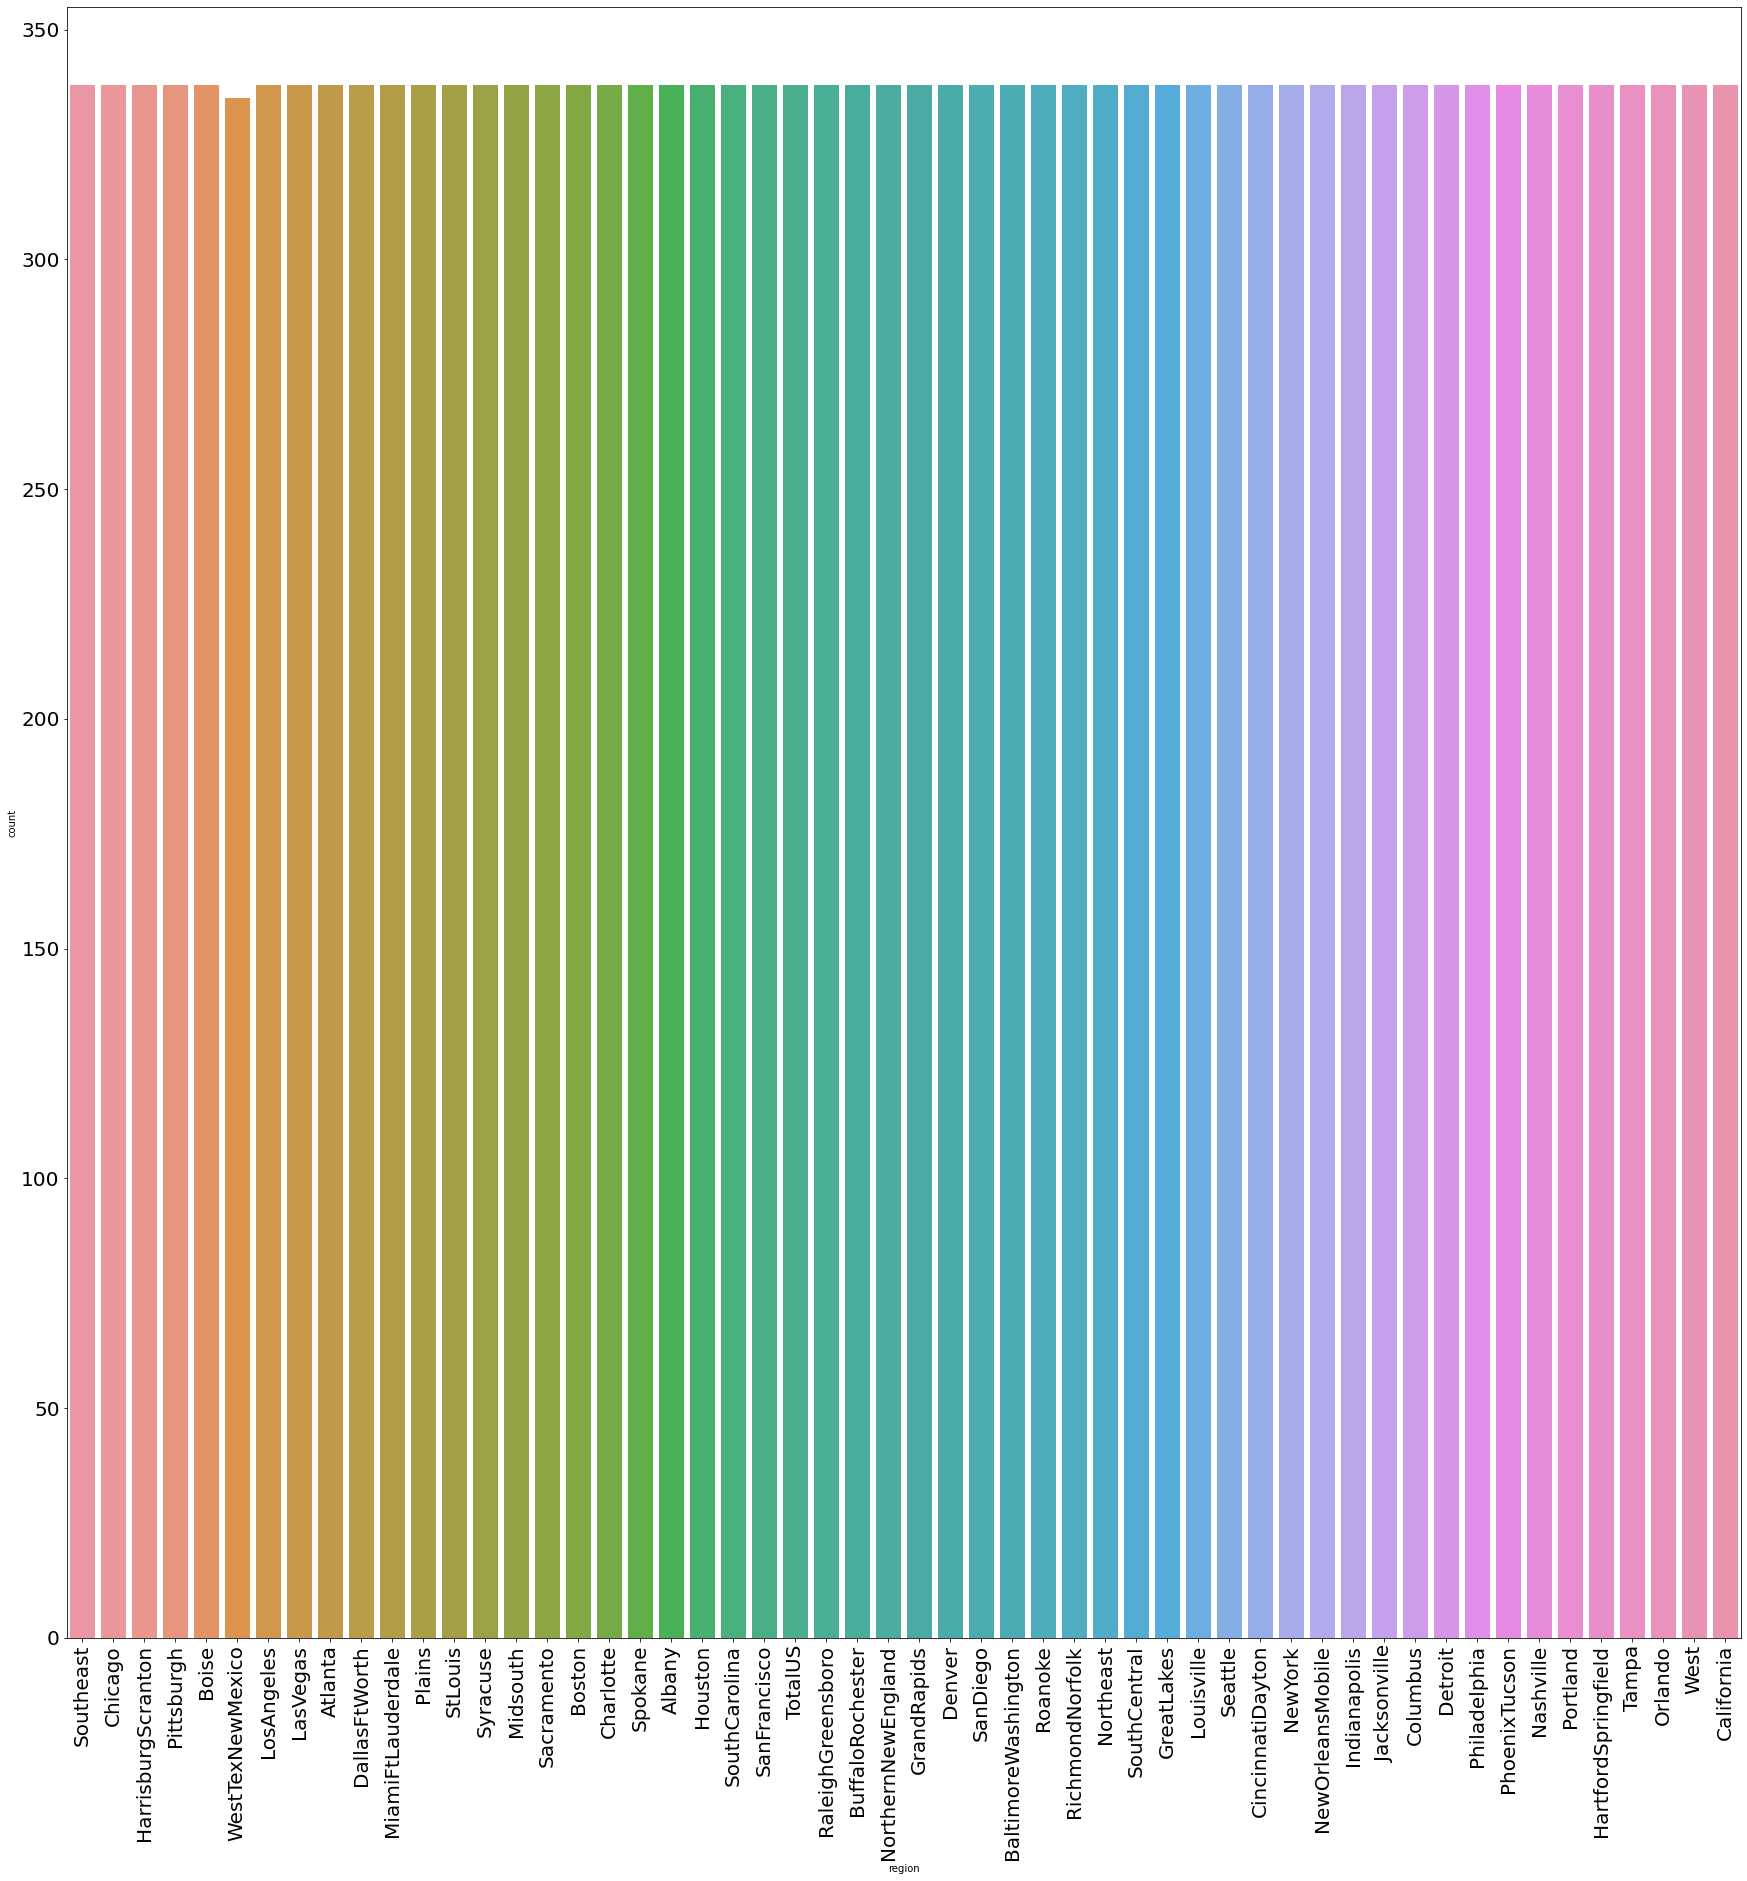

In [82]:
plt.figure(figsize=(30,30))
plt.xticks(rotation=90, size=20)
plt.yticks(size=20)
sns.countplot(x = 'region', data=dataset)

# Realizar una gráfica de barras para ver de qué años se tiene información

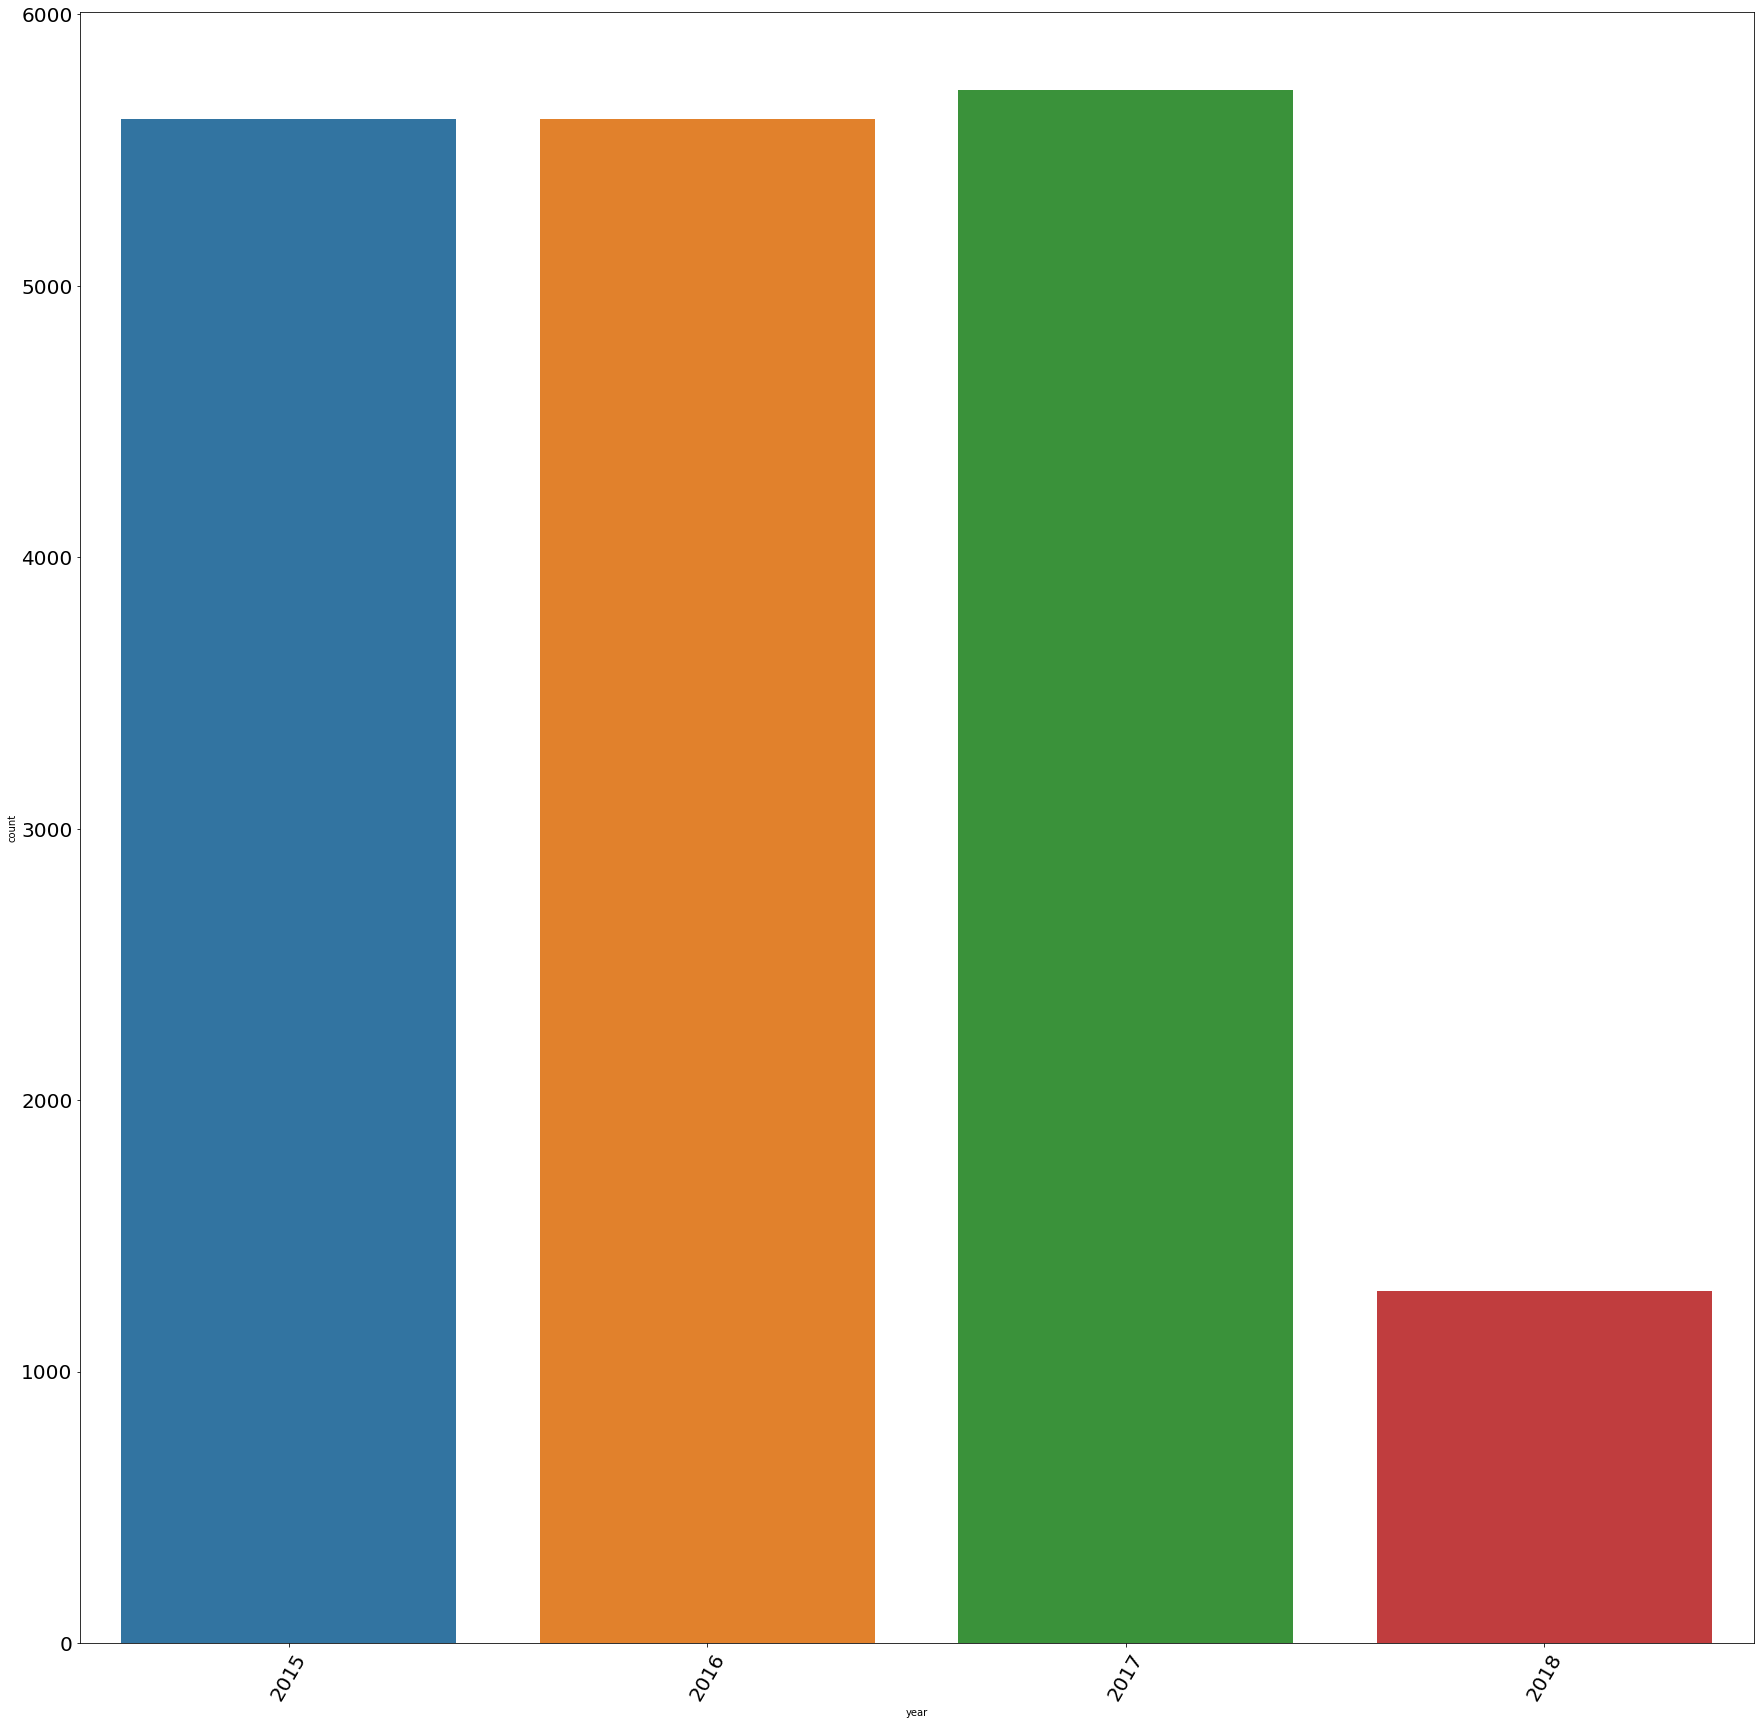

In [83]:
plt.figure(figsize=(30,30))
plt.xticks(rotation=60, size=20)
plt.yticks(size=20)
sns.countplot(x = 'year', data=dataset)

# Preparar los datos para que se acoplen a lo que requiere el modelo a utilizar

In [84]:
datos = dataset[['Date', 'AveragePrice']]
datos = datos.rename(columns={'Date':'ds', 'AveragePrice':'y'})
datos = datos.sort_values(by='ds', ascending=True)
datos

,ds,y
11569,2015-01-04,1.75
11829,2015-01-04,1.46
11777,2015-01-04,1.70
675,2015-01-04,0.99
1247,2015-01-04,0.92
...,...,...
8670,2018-03-25,1.21
17997,2018-03-25,1.52
17733,2018-03-25,1.46
8706,2018-03-25,1.05


# Creación y ajuste del modelo

In [87]:
modelo = prophet.Prophet()

In [89]:
modelo.fit(datos)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzwia9_yt/vp56r7ss.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzwia9_yt/jgh30kah.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91750', 'data', 'file=/tmp/tmpzwia9_yt/vp56r7ss.json', 'init=/tmp/tmpzwia9_yt/jgh30kah.json', 'output', 'file=/tmp/tmpzwia9_yt/prophet_modelu20yfm9a/prophet_model-20221104200649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:06:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Pronosticar hacia el futuro un año (365 días)

In [90]:
prediccion = modelo.predict(modelo.make_future_dataframe(periods=365))
prediccion

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.500915,0.902934,1.860951,1.500915,1.500915,-0.117892,-0.117892,-0.117892,-0.117892,-0.117892,-0.117892,0.0,0.0,0.0,1.383023
1,2015-01-11,1.495570,0.926586,1.852440,1.495570,1.495570,-0.109441,-0.109441,-0.109441,-0.109441,-0.109441,-0.109441,0.0,0.0,0.0,1.386129
2,2015-01-18,1.490226,0.876527,1.885281,1.490226,1.490226,-0.109017,-0.109017,-0.109017,-0.109017,-0.109017,-0.109017,0.0,0.0,0.0,1.381208
3,2015-01-25,1.484881,0.860016,1.860694,1.484881,1.484881,-0.127761,-0.127761,-0.127761,-0.127761,-0.127761,-0.127761,0.0,0.0,0.0,1.357119
4,2015-02-01,1.479536,0.843544,1.813362,1.479536,1.479536,-0.155746,-0.155746,-0.155746,-0.155746,-0.155746,-0.155746,0.0,0.0,0.0,1.323790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.169820,0.529001,1.620578,0.975859,1.376561,-0.086478,-0.086478,-0.086478,-0.086478,-0.086478,-0.086478,0.0,0.0,0.0,1.083342
530,2019-03-22,1.169100,0.560865,1.642348,0.974351,1.377444,-0.084675,-0.084675,-0.084675,-0.084675,-0.084675,-0.084675,0.0,0.0,0.0,1.084425
531,2019-03-23,1.168380,0.563556,1.612519,0.972844,1.378469,-0.082592,-0.082592,-0.082592,-0.082592,-0.082592,-0.082592,0.0,0.0,0.0,1.085788
532,2019-03-24,1.167660,0.529337,1.615736,0.971336,1.378617,-0.080251,-0.080251,-0.080251,-0.080251,-0.080251,-0.080251,0.0,0.0,0.0,1.087410


# Graficar los datos históricos y los del futuro

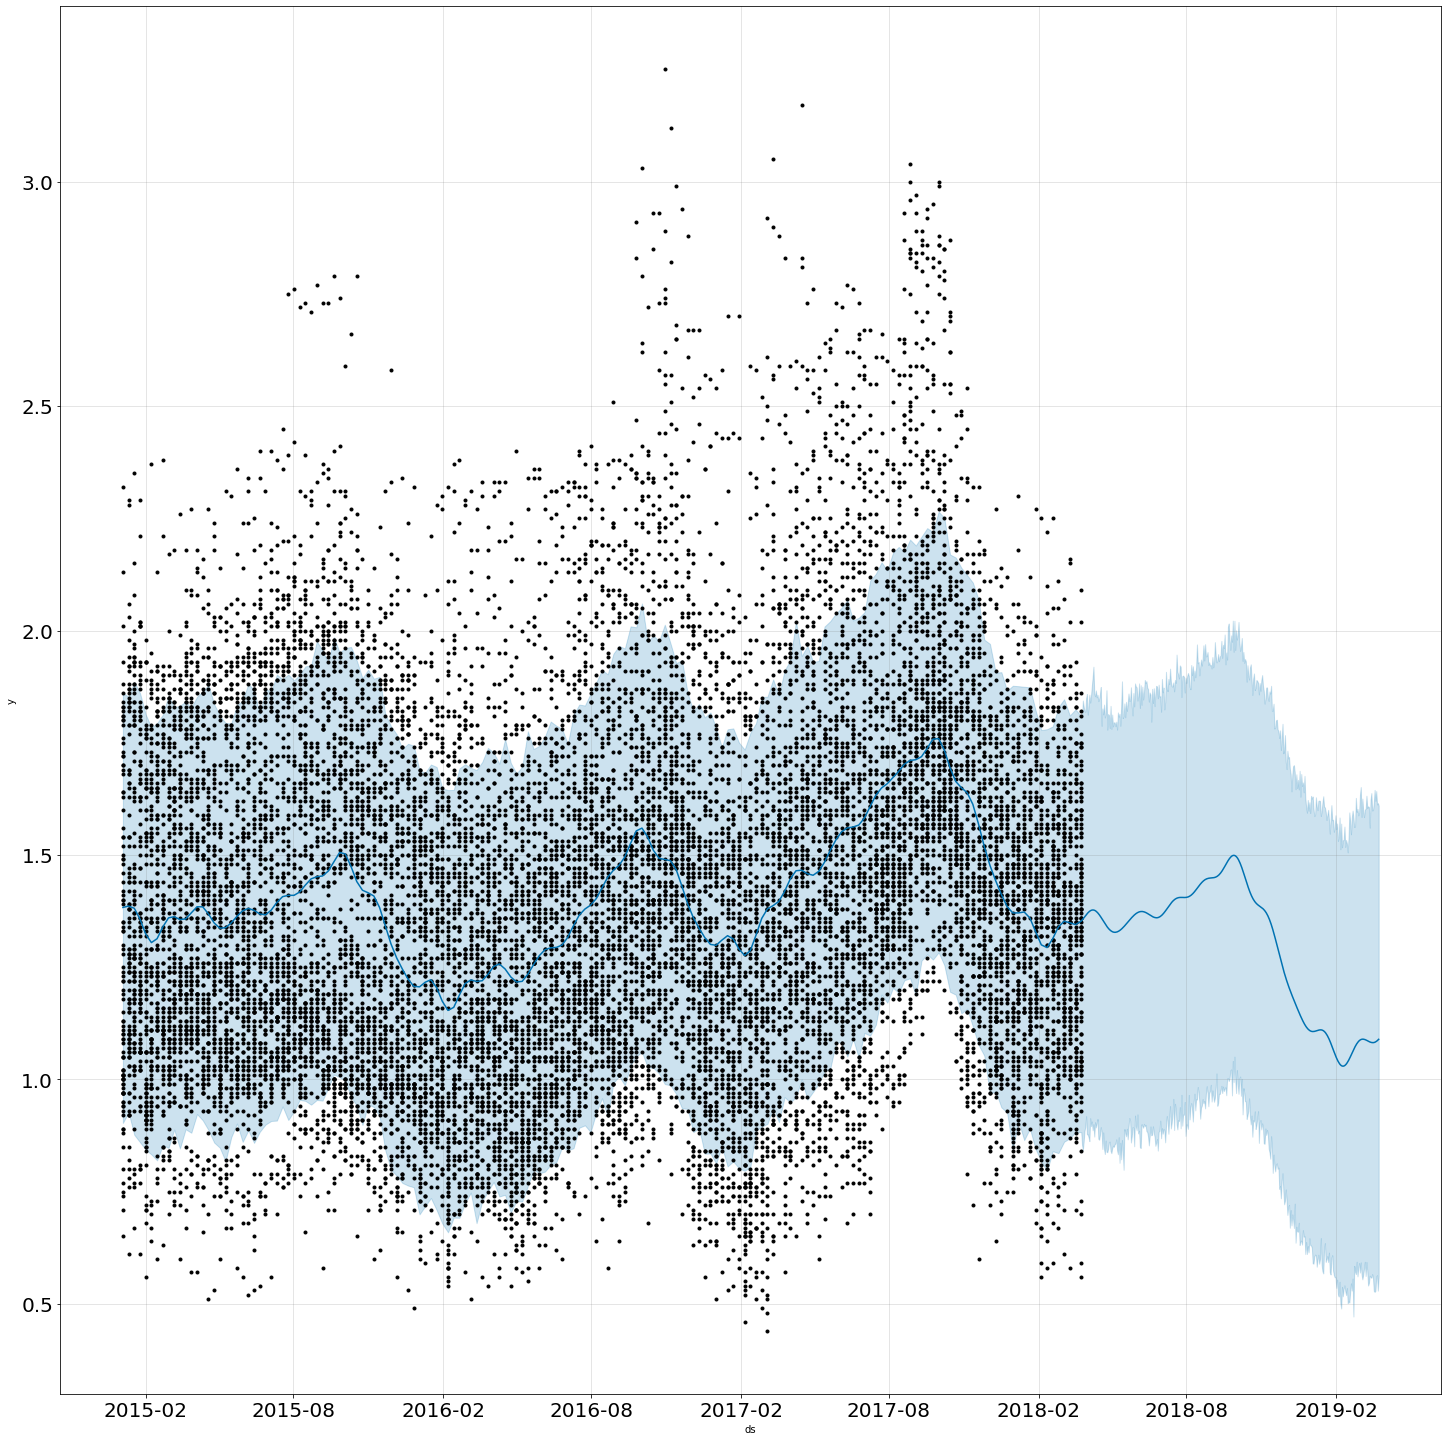

In [91]:
ax = modelo.plot(prediccion, figsize=(20,20))
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Graficar los componentes del pronóstico

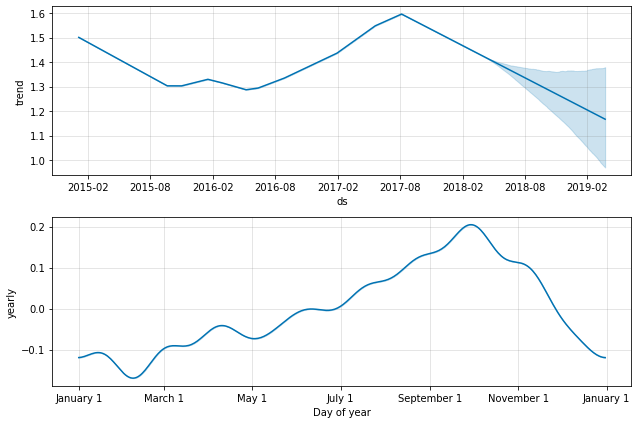

In [92]:
ax = modelo.plot_components(prediccion)

# PARTE 2

### Repetir el ejercicio pero solo con la región oeste "West" de los EEUU

### Leer el archivo de datos

### Por si acaso no están ordenadas las observaciones

# Graficar el precio promedio vs fecha

### ¿Es diferente la tendencia comparado a la tendencia nacional?

# Crear el modelo y ajustarlo con los datos

### Preparar los datos para que sean aceptados por el modelo a usar

# Pronosticar al futuro un año (365 días)

# Graficar datos históricos y pronosticados